<a href="https://colab.research.google.com/github/kevin-pk/Face_Value/blob/main/face_measurements_with_dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install dlib
! pip install opencv-python
! pip install numpy


In [2]:
# all the lib needed
import dlib
import matplotlib.pyplot as plt
import cv2
import bz2

### loading the ... image

In [5]:
# image path
image_path = "/content/1.jpg"
image = cv2.imread(image_path)

# coverting image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## initializing face detector

In [6]:
# this is a base detector that come with dlib
detector = dlib.get_frontal_face_detector()


### decompressing the file


## detecting faces in images

In [7]:
# New variable faces passes the dlib detector variable our grayscale image
faces = detector(gray)


In [8]:
# Referencing a landmark file that I choose
dlib_facelandmark = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")


## visualizing detected faces

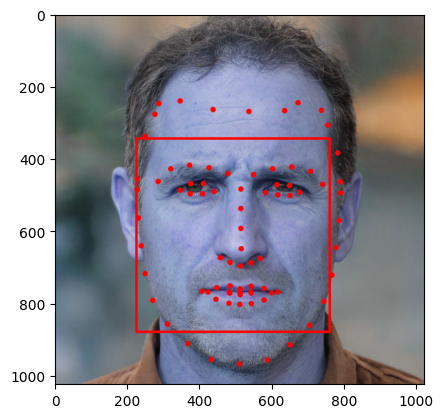

In [9]:
# Iterating through faces
for face in faces:
    # Attaching the grayscale image and the landmarks
    landmarks = dlib_facelandmark(gray, face)
    # Iterating through 81 face landmarks
    for n in range(0, 81):
        # Plotting specific landmarks on the x and y axis
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        # Turning those landmarks into circles, choosing the color red, and having a thickness of 20
        cv2.circle(image, (x, y), 4, (255, 0, 0), 5)

plt.imshow(image, cmap='gray')

# Face size box

# Iterating through faces to create detection size box
for face in faces:
    # Assigning side coordinates of the face to each variable x, y, etc.
    x, y, w, h = face.left(), face.top(), face.right(), face.bottom()
    # Passing image to the rectangle function in cv2, groups two sides together, picks color of box, changes thickness of box
    cv2.rectangle(image, (x, y), (w, h), (255, 0, 0), 5)

# Shows our final output
plt.imshow(image, cmap='gray')


### building DIF chart.

In [10]:
tn = (landmarks.part(71).x, landmarks.part(71).y)      # Nose tip
n = (landmarks.part(27).x, landmarks.part(27).y)       # Nasal base
gn = (landmarks.part(8).x, landmarks.part(8).y)         # Chin
sn = (landmarks.part(33).x, landmarks.part(33).y)       # Mouth center
zy = (landmarks.part(2).x, landmarks.part(2).y)         # Left zygion
zy2 = (landmarks.part(14).x, landmarks.part(14).y)     # Right zygion
go = (landmarks.part(14).x, landmarks.part(14).y)       # Right outer corner of the eye
go1 = (landmarks.part(5).x, landmarks.part(5).y)       # Right inner corner of the eye
go2 = (landmarks.part(11).x, landmarks.part(11).y)      # Left inner corner of the eye
en = (landmarks.part(39).x, landmarks.part(39).y)       # Left inner corner of the eye
en1 = (landmarks.part(42).x, landmarks.part(42).y)      # Right inner corner of the eye
ex = (landmarks.part(45).x, landmarks.part(45).y)       # Right outer corner of the eye
ex1 = (landmarks.part(36).x, landmarks.part(36).y)      # Left outer corner of the eye
al = (landmarks.part(31).x, landmarks.part(31).y)       # Left nostril
al1 = (landmarks.part(35).x, landmarks.part(35).y)
ch =  (landmarks.part(48).x, landmarks.part(48).y)      # left side of mouth
ch1 = (landmarks.part(54).x, landmarks.part(54).y)      # right side of mouth


# horizontal distances are 0 , vertical are 1

head_height = abs(tn[1] - n[1])                          # Vertical distance from nose tip to nasal base
face_height = abs(tn[1] - gn[1])                         # Vertical distance from nose tip to chin
face_height2 = abs(n[1] - gn[1])                         # Vertical distance from nasal base to chin
face_height3 = abs(sn[1] - gn[1])                        # Vertical distance from mouth center to chin
face_width = abs(zy[0] - zy2[0])                         # Horizontal distance between left and right zygion
face_width2 = abs(go[0] - go2[0])                        # Horizontal distance between outer corners of eyes
Orbits_intercanthal_width = abs(en[0] - en1[0])        # Horizontal distance between inner corners of eyes
Orbits_fissure_length = abs(en[0] - ex[0])              # Horizontal distance from inner to outer corner of the left eye
Orbits_biocular_width = abs(ex1[0] - ex[0])
Nose_height = abs(n[1] - sn[1])
Nose_width = abs(al[0] - al1[0])
Labio_oral_region = abs(ch[0] - ch1[0])

print(face_width)


539


In [11]:
# making a chart for the data
import pandas as pd
data = {
    ' cranial facial area': ['Head Height', 'Face Height', 'Face Height 2', 'Face Height 3',
                    'Face Width', 'Face Width 2', 'Orbits Intercanthal Width',
                             "Orbits_fissure_length", "Orbits_biocular_width", "Nose_height",
                             "Nose_width"],
    'measurement (Pixels)': [head_height, face_height, face_height2, face_height3, face_width, face_width2,
                       Orbits_intercanthal_width, Orbits_fissure_length, Orbits_biocular_width
                             , Nose_height, Nose_width]}


df = pd.DataFrame(data)


print(df)


          cranial facial area  measurement (Pixels)
0                 Head Height                   215
1                 Face Height                   699
2               Face Height 2                   484
3               Face Height 3                   271
4                  Face Width                   539
5                Face Width 2                    73
6   Orbits Intercanthal Width                   142
7       Orbits_fissure_length                   237
8       Orbits_biocular_width                   331
9                 Nose_height                   213
10                 Nose_width                   110


## pixels to centimeters (cm)

In [12]:

import math

density_per_pixel = 133.25
Nose_width = (Nose_width / density_per_pixel) * 2.54
Nose_height = (Nose_height / density_per_pixel) * 2.54
Labio_oral_region = (Labio_oral_region / density_per_pixel) * 2.54
Orbits_intercanthal_width = (Orbits_intercanthal_width / density_per_pixel) * 2.54
Orbits_biocular_width = (Orbits_biocular_width / density_per_pixel) * 2.54
Orbits_fissure_length = (Orbits_fissure_length / density_per_pixel) * 2.54
face_width = (face_width / density_per_pixel) * 2.54
face_width2 = (face_width2 / density_per_pixel) * 2.54


##outputting those values


In [13]:
print(Nose_width)
print(Nose_height)
print(Labio_oral_region)
print(Orbits_intercanthal_width)
print(Orbits_biocular_width)
print(Orbits_fissure_length)
print(face_width)
print(face_width2)

2.0968105065666043
4.060187617260788
4.003001876172608
2.7067917448405256
6.309493433395872
4.517673545966229
10.274371482176361
1.3915196998123829
